Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5176 - loss: 3.1652 - val_accuracy: 0.5920 - val_loss: 0.6786
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6646 - loss: 0.6507 - val_accuracy: 0.6530 - val_loss: 0.6426
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7378 - loss: 0.5541 - val_accuracy: 0.6670 - val_loss: 0.6080
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8308 - loss: 0.4198 - val_accuracy: 0.6900 - val_loss: 0.5941
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9062 - loss: 0.2914 - val_accuracy: 0.6760 - val_loss: 0.6403
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6868 - loss: 0.6356
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1

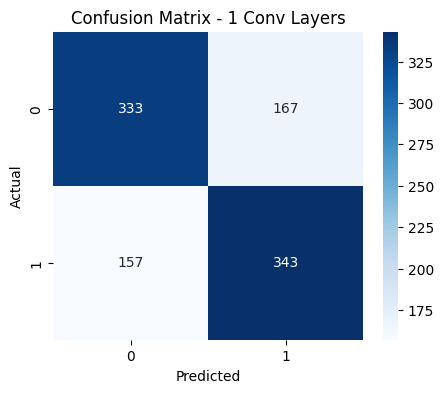

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs.zip", origin=dataset_url, extract=True)
dataset_dir = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")

train_dir = os.path.join(dataset_dir, "train")
validation_dir = os.path.join(dataset_dir, "validation")

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE
)

# Define CNN model with 1 convolutional layer
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)
loss, accuracy = model.evaluate(validation_dataset)

# Get predictions
y_true, y_pred = [], []
for images, labels in validation_dataset:
    preds = (model.predict(images) > 0.5).astype("int32")
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

# Compute metrics
report = classification_report(y_true, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print results in the required format
print("\nUsing 1 Convolutional Layer\n")
print("Convolutional Layer  Accuracy  Recall  Precision  F1 Score")
print(f"1                   {accuracy:.4f}  {report['macro avg']['recall']:.4f}  {report['macro avg']['precision']:.4f}  {report['macro avg']['f1-score']:.4f}\n")

print("\nClass-wise Metrics:\n")
print("             Precision  Recall  F1 Score  Support")
print(f"cat          {report['0']['precision']:.2f}      {report['0']['recall']:.2f}   {report['0']['f1-score']:.2f}    {report['0']['support']:.0f}")
print(f"dog          {report['1']['precision']:.2f}      {report['1']['recall']:.2f}   {report['1']['f1-score']:.2f}    {report['1']['support']:.0f}\n")

print(f"accuracy     {accuracy:.2f}   {sum(y_true)}")
print(f"macro avg    {report['macro avg']['precision']:.2f}   {report['macro avg']['recall']:.2f}   {report['macro avg']['f1-score']:.2f}   {sum(y_true)}")
print(f"weighted avg {report['weighted avg']['precision']:.2f}   {report['weighted avg']['recall']:.2f}   {report['weighted avg']['f1-score']:.2f}   {sum(y_true)}\n")

print("\nConfusion Matrix:\n")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - 1 Conv Layers")
plt.show()

# Save model
model.save("cnn_1_layers.h5")

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5598 - loss: 1.0182 - val_accuracy: 0.6190 - val_loss: 0.6630
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6434 - loss: 0.6334 - val_accuracy: 0.6610 - val_loss: 0.6390
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7394 - loss: 0.5325 - val_accuracy: 0.6780 - val_loss: 0.6438
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8046 - loss: 0.3926 - val_accuracy: 0.6780 - val_loss: 0.6916
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8797 - loss: 0.2774 - val_accuracy: 0.6800 - val_loss: 0.8094
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6842 - loss: 0.8621
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1

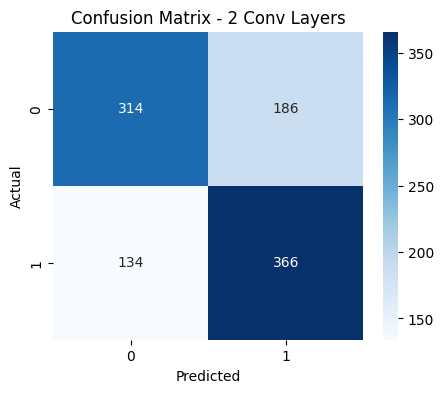

In [8]:
# Define CNN model with 2 convolutional layers
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)
loss, accuracy = model.evaluate(validation_dataset)

# Get predictions
y_true, y_pred = [], []
for images, labels in validation_dataset:
    preds = (model.predict(images) > 0.5).astype("int32")
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

# Compute metrics
report = classification_report(y_true, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print results in the required format
print("\nUsing 2 Convolutional Layer\n")
print("Convolutional Layer  Accuracy  Recall  Precision  F1 Score")
print(f"2                   {accuracy:.4f}  {report['macro avg']['recall']:.4f}  {report['macro avg']['precision']:.4f}  {report['macro avg']['f1-score']:.4f}\n")

print("\nClass-wise Metrics:\n")
print("             Precision  Recall  F1 Score  Support")
print(f"cat          {report['0']['precision']:.2f}      {report['0']['recall']:.2f}   {report['0']['f1-score']:.2f}    {report['0']['support']:.0f}")
print(f"dog          {report['1']['precision']:.2f}      {report['1']['recall']:.2f}   {report['1']['f1-score']:.2f}    {report['1']['support']:.0f}\n")

print(f"accuracy     {accuracy:.2f}   {sum(y_true)}")
print(f"macro avg    {report['macro avg']['precision']:.2f}   {report['macro avg']['recall']:.2f}   {report['macro avg']['f1-score']:.2f}   {sum(y_true)}")
print(f"weighted avg {report['weighted avg']['precision']:.2f}   {report['weighted avg']['recall']:.2f}   {report['weighted avg']['f1-score']:.2f}   {sum(y_true)}\n")

print("\nConfusion Matrix:\n")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - 2 Conv Layers")
plt.show()

# Save model
model.save("cnn_2_layers.h5")

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.5119 - loss: 0.7267 - val_accuracy: 0.5080 - val_loss: 0.6880
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5712 - loss: 0.6721 - val_accuracy: 0.6570 - val_loss: 0.6264
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6772 - loss: 0.6101 - val_accuracy: 0.6720 - val_loss: 0.6118
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7188 - loss: 0.5509 - val_accuracy: 0.6730 - val_loss: 0.6351
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7425 - loss: 0.5158 - val_accuracy: 0.7020 - val_loss: 0.5603
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7143 - loss: 0.5507
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1

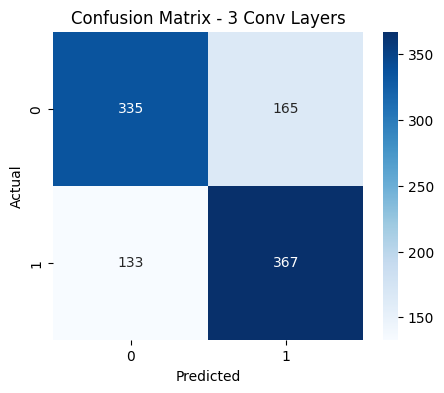

In [10]:
# Define CNN model with 3 convolutional layers
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)
loss, accuracy = model.evaluate(validation_dataset)

# Get predictions
y_true, y_pred = [], []
for images, labels in validation_dataset:
    preds = (model.predict(images) > 0.5).astype("int32")
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

# Compute metrics
report = classification_report(y_true, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print results in the required format
print("\nUsing 3 Convolutional Layer\n")
print("Convolutional Layer  Accuracy  Recall  Precision  F1 Score")
print(f"3                   {accuracy:.4f}  {report['macro avg']['recall']:.4f}  {report['macro avg']['precision']:.4f}  {report['macro avg']['f1-score']:.4f}\n")

print("\nClass-wise Metrics:\n")
print("             Precision  Recall  F1 Score  Support")
print(f"cat          {report['0']['precision']:.2f}      {report['0']['recall']:.2f}   {report['0']['f1-score']:.2f}    {report['0']['support']:.0f}")
print(f"dog          {report['1']['precision']:.2f}      {report['1']['recall']:.2f}   {report['1']['f1-score']:.2f}    {report['1']['support']:.0f}\n")

print(f"accuracy     {accuracy:.2f}   {sum(y_true)}")
print(f"macro avg    {report['macro avg']['precision']:.2f}   {report['macro avg']['recall']:.2f}   {report['macro avg']['f1-score']:.2f}   {sum(y_true)}")
print(f"weighted avg {report['weighted avg']['precision']:.2f}   {report['weighted avg']['recall']:.2f}   {report['weighted avg']['f1-score']:.2f}   {sum(y_true)}\n")

print("\nConfusion Matrix:\n")
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - 3 Conv Layers")
plt.show()

# Save model
model.save("cnn_3_layers.h5")

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.5191 - loss: 0.6945 - val_accuracy: 0.5790 - val_loss: 0.6748
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5683 - loss: 0.6752 - val_accuracy: 0.6270 - val_loss: 0.6472
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6298 - loss: 0.6415 - val_accuracy: 0.6520 - val_loss: 0.6193
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6742 - loss: 0.5960 - val_accuracy: 0.7310 - val_loss: 0.5521
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7425 - loss: 0.5152 - val_accuracy: 0.7110 - val_loss: 0.5612
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7194 - loss: 0.5610
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1

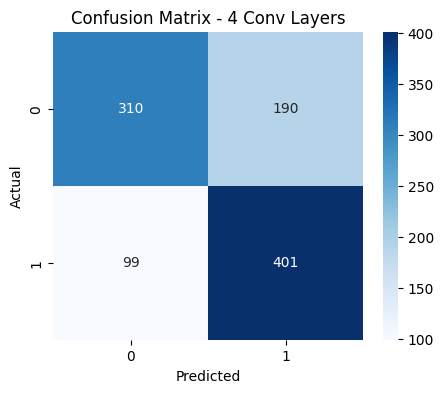

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs.zip", origin=dataset_url, extract=True)
dataset_dir = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")

train_dir = os.path.join(dataset_dir, "train")
validation_dir = os.path.join(dataset_dir, "validation")

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE
)

# Define CNN model with 4 convolutional layers
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

# Evaluate model
loss, accuracy = model.evaluate(validation_dataset)

# Get predictions
y_true, y_pred = [], []
for images, labels in validation_dataset:
    preds = (model.predict(images) > 0.5).astype("int32")
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

# Compute metrics
report = classification_report(y_true, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print results in the required format
print("\nUsing 4 Convolutional Layer\n")
print("Convolutional Layer  Accuracy  Recall  Precision  F1 Score")
print(f"4                   {accuracy:.4f}  {report['macro avg']['recall']:.4f}  {report['macro avg']['precision']:.4f}  {report['macro avg']['f1-score']:.4f}\n")

print("\nClass-wise Metrics:\n")
print("             Precision  Recall  F1 Score  Support")
print(f"cat          {report['0']['precision']:.2f}      {report['0']['recall']:.2f}   {report['0']['f1-score']:.2f}    {report['0']['support']:.0f}")
print(f"dog          {report['1']['precision']:.2f}      {report['1']['recall']:.2f}   {report['1']['f1-score']:.2f}    {report['1']['support']:.0f}\n")

print(f"accuracy     {accuracy:.2f}   {sum(y_true)}")
print(f"macro avg    {report['macro avg']['precision']:.2f}   {report['macro avg']['recall']:.2f}   {report['macro avg']['f1-score']:.2f}   {sum(y_true)}")
print(f"weighted avg {report['weighted avg']['precision']:.2f}   {report['weighted avg']['recall']:.2f}   {report['weighted avg']['f1-score']:.2f}   {sum(y_true)}\n")

print("\nConfusion Matrix:\n")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - 4 Conv Layers")
plt.show()

# Save model
model.save("cnn_4_layers.h5")
